In [13]:
import pandas as pd

LF = pd.read_csv("LF_position.csv")

LF.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
1,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
2,211110,P. Dybala,24,Argentina,89,94,Juventus,€89M,€205K,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
3,198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,Left,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
4,198219,L. Insigne,27,Italy,88,88,Napoli,€62M,€165K,Right,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M
5,197781,Isco,26,Spain,88,91,Real Madrid,€73.5M,€315K,Right,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
6,189242,Coutinho,26,Brazil,88,89,FC Barcelona,€69.5M,€340K,Right,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M
7,222492,L. Sané,22,Germany,86,92,Manchester City,€61M,€195K,Left,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
8,41,Iniesta,34,Spain,86,86,Vissel Kobe,€21.5M,€21K,Right,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
9,211300,A. Martial,22,France,84,90,Manchester United,€42.5M,€165K,Right,...,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,€87.1M


In [14]:
LF = LF.drop(['Nationality','Overall','Club','International Reputation','Work Rate','Body Type',
                           'Jersey Number','Joined','Loaned From','Contract Valid Until','GKDiving','GKHandling','GKKicking',
                           'GKPositioning','GKReflexes','Release Clause','Positioning'], axis=1)


LF.head(10)


,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,190871,Neymar Jr,26,93,€118.5M,€290K,Right,5.0,5.0,LW,...,49.0,82.0,56.0,36.0,87.0,81.0,94.0,27.0,24.0,33.0
1,183277,E. Hazard,27,91,€93M,€340K,Right,4.0,4.0,LF,...,66.0,80.0,54.0,41.0,89.0,86.0,91.0,34.0,27.0,22.0
2,211110,P. Dybala,24,94,€89M,€205K,Left,3.0,4.0,LF,...,65.0,88.0,48.0,32.0,87.0,86.0,84.0,23.0,20.0,20.0
3,198710,J. Rodríguez,26,89,€69.5M,€315K,Left,3.0,4.0,LAM,...,68.0,92.0,64.0,55.0,89.0,81.0,87.0,52.0,41.0,44.0
4,198219,L. Insigne,27,88,€62M,€165K,Right,3.0,4.0,LW,...,44.0,84.0,34.0,26.0,87.0,61.0,83.0,51.0,24.0,22.0
5,197781,Isco,26,91,€73.5M,€315K,Right,3.0,4.0,LW,...,59.0,87.0,58.0,64.0,89.0,76.0,86.0,60.0,64.0,51.0
6,189242,Coutinho,26,89,€69.5M,€340K,Right,4.0,5.0,LW,...,61.0,93.0,59.0,49.0,90.0,70.0,85.0,55.0,54.0,47.0
7,222492,L. Sané,22,92,€61M,€195K,Left,3.0,4.0,LW,...,70.0,78.0,61.0,34.0,82.0,71.0,78.0,36.0,32.0,35.0
8,41,Iniesta,34,86,€21.5M,€21K,Right,4.0,4.0,LF,...,58.0,71.0,58.0,66.0,93.0,71.0,89.0,67.0,57.0,56.0
9,211300,A. Martial,22,90,€42.5M,€165K,Right,3.0,4.0,LW,...,75.0,80.0,58.0,42.0,73.0,81.0,79.0,38.0,39.0,36.0


In [15]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
LF['Preferred Foot'] =label_encoder.fit_transform(LF['Preferred Foot'])
LF['Position'] =label_encoder.fit_transform(LF['Position'])

def convert_height_to_cm(height):
    try:
        feet, inches = map(int, height.split("'"))
        total_inches = feet * 12 + inches
        height_cm = total_inches * 2.54
        return round(height_cm, 2)
    except Exception as e:
        print(f"Error converting height: {e}")
        return None
    
def convert_weight_to_kg(weight):
    try:
        # Remove 'lbs' from the string and convert to float
        weight_kg = float(weight.replace('lbs', '').strip()) * 0.453592
        return round(weight_kg, 2)
    except Exception as e:
        print(f"Error converting weight: {e}")
        return None

# Applying the conversion functions
LF['Height'] = LF['Height'].apply(convert_height_to_cm)
LF['Weight'] = LF['Weight'].apply(convert_weight_to_kg)

# Function to convert Value and Wage
def convert_value_wage(value):
    if value[-1] == 'M':
        return float(value[1:-1]) * 1e6
    elif value[-1] == 'K':
        return float(value[1:-1]) * 1e3
    return float(value[1:])

# Apply conversion
LF['Value'] = LF['Value'].apply(convert_value_wage).astype(int)
LF['Wage'] = LF['Wage'].apply(convert_value_wage).astype(int)

LF.head(10)

,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,190871,Neymar Jr,26,93,118500000,290000,1,5.0,5.0,2,...,49.0,82.0,56.0,36.0,87.0,81.0,94.0,27.0,24.0,33.0
1,183277,E. Hazard,27,91,93000000,340000,1,4.0,4.0,1,...,66.0,80.0,54.0,41.0,89.0,86.0,91.0,34.0,27.0,22.0
2,211110,P. Dybala,24,94,89000000,205000,0,3.0,4.0,1,...,65.0,88.0,48.0,32.0,87.0,86.0,84.0,23.0,20.0,20.0
3,198710,J. Rodríguez,26,89,69500000,315000,0,3.0,4.0,0,...,68.0,92.0,64.0,55.0,89.0,81.0,87.0,52.0,41.0,44.0
4,198219,L. Insigne,27,88,62000000,165000,1,3.0,4.0,2,...,44.0,84.0,34.0,26.0,87.0,61.0,83.0,51.0,24.0,22.0
5,197781,Isco,26,91,73500000,315000,1,3.0,4.0,2,...,59.0,87.0,58.0,64.0,89.0,76.0,86.0,60.0,64.0,51.0
6,189242,Coutinho,26,89,69500000,340000,1,4.0,5.0,2,...,61.0,93.0,59.0,49.0,90.0,70.0,85.0,55.0,54.0,47.0
7,222492,L. Sané,22,92,61000000,195000,0,3.0,4.0,2,...,70.0,78.0,61.0,34.0,82.0,71.0,78.0,36.0,32.0,35.0
8,41,Iniesta,34,86,21500000,21000,1,4.0,4.0,1,...,58.0,71.0,58.0,66.0,93.0,71.0,89.0,67.0,57.0,56.0
9,211300,A. Martial,22,90,42500000,165000,1,3.0,4.0,2,...,75.0,80.0,58.0,42.0,73.0,81.0,79.0,38.0,39.0,36.0


In [16]:
LF['Passing'] = LF['Crossing']  +LF['ShortPassing'] +LF['LongPassing']

LF['Ball_Control'] =  LF['Dribbling']  +LF['BallControl'] +LF['Composure'] +LF['HeadingAccuracy'] 

LF['Fitness'] = LF['Acceleration'] +LF['SprintSpeed'] +LF['Agility'] +LF['Reactions'] +LF['Balance'] +LF['Jumping'] +LF['Stamina'] +LF['Strength'] +LF['Aggression'] +LF['Vision']

LF['Defensive_abilities'] =LF['Interceptions'] +LF['Marking']  +LF['StandingTackle']  +LF['SlidingTackle'] 

LF['Shooting'] = LF['Curve'] +LF['FKAccuracy'] +LF['Finishing'] +LF['Penalties'] +LF['LongShots'] 

LF = LF [['Name','ID','Passing','Ball_Control','Value','Fitness','Defensive_abilities','Potential','Weight','Shooting','Age']]
LF.head(10)

,Name,ID,Passing,Ball_Control,Value,Fitness,Defensive_abilities,Potential,Weight,Shooting,Age
0,Neymar Jr,190871,241.0,347.0,118500000,792.0,120.0,93,68.04,425.0,26
1,E. Hazard,183277,253.0,341.0,93000000,809.0,124.0,91,73.94,412.0,27
2,P. Dybala,211110,244.0,336.0,89000000,787.0,95.0,94,74.84,434.0,24
3,J. Rodríguez,198710,262.0,324.0,69500000,729.0,192.0,89,78.02,431.0,26
4,L. Insigne,198219,249.0,322.0,62000000,743.0,123.0,88,58.97,386.0,27
5,Isco,197781,247.0,330.0,73500000,738.0,239.0,91,78.93,406.0,26
6,Coutinho,189242,250.0,316.0,69500000,780.0,205.0,89,68.04,419.0,26
7,L. Sané,222492,226.0,323.0,61000000,795.0,137.0,92,74.84,380.0,22
8,Iniesta,41,252.0,325.0,21500000,697.0,246.0,86,68.04,362.0,34
9,A. Martial,211300,213.0,321.0,42500000,779.0,155.0,90,76.20,383.0,22


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from itertools import product
from sklearn.linear_model import Ridge

x = LF.drop(['Name','ID', 'Potential'], axis=1)
y = LF['Potential']

# Now split the cleaned data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
import CombinedModle

# Assuming your data is already loaded and split into x_train, y_train, x_test, y_test
Combine_test, Combine_train = CombinedModle.train_and_evaluate(x_train, y_train, x_test, y_test)

Combined R^2 Test: 0.8838564051663047
Combined R^2 Train: 0.9687034286782702


In [19]:
import PlayerPotential

# # Assuming you have CB, x_test, y_test, and Combine_test from the previous steps
top_players = PlayerPotential.get_top_players(LF, x_test, y_test, Combine_test)

# # Print the top 10 players
print(top_players)


                Name      ID  Actual_Potential  Potential
0          Neymar Jr  190871                93  93.007150
3       J. Rodríguez  198710                89  90.449199
5               Isco  197781                91  89.928052
9         A. Martial  211300                90  88.576991
30   Vinícius Júnior  238794                92  85.861876
17       S. Bergwijn  225953                86  84.421149
22        Diogo Jota  224458                86  84.083961
19             Bruma  211368                83  83.784077
124   C. Hudson-Odoi  240740                87  83.729979
18          F. Cervi  223061                84  82.872334


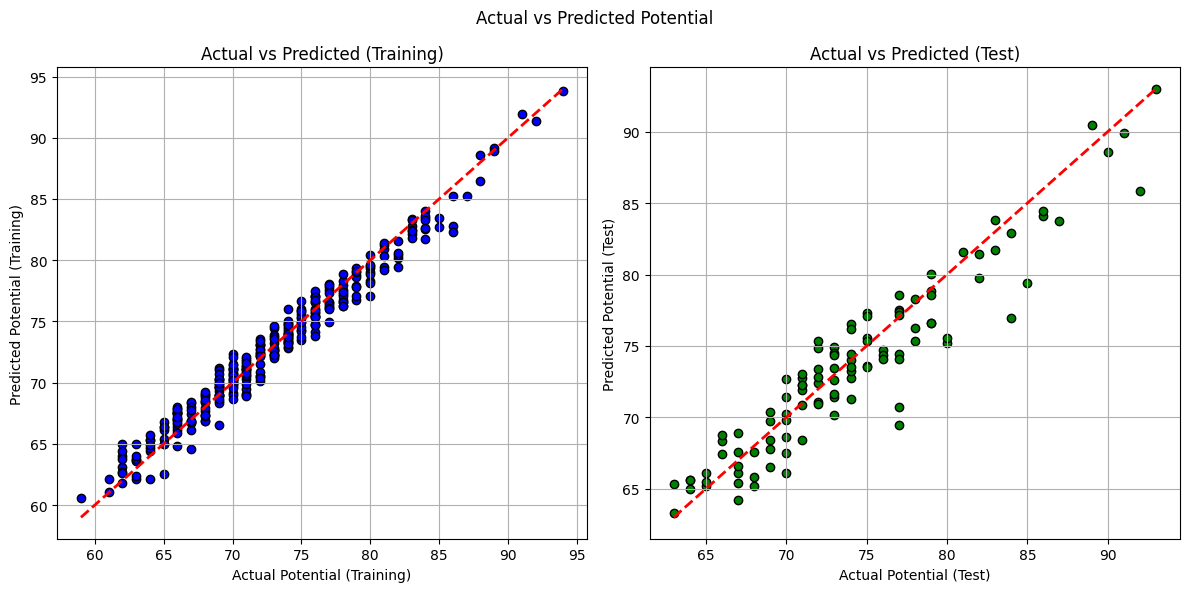

In [21]:
from plot_utils import Plot_actual_vs_predicted

Plot_actual_vs_predicted(y_train, y_test, Combine_train, Combine_test)